<a href="https://colab.research.google.com/github/jcanevello/MIA-AlgoritmosOptimizacion/blob/master/Seminario_Algoritmos_Jean_Canevello_Salazar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Jean Carlo Canevello Salazar   <br>
Url: https://colab.research.google.com/drive/131WCd4rzh78Lu0W3TsUVzZNW6VjXeBHi?usp=sharing<br>
Github: <br>
Problema:

>2. Organizar los horarios de partidos de La Liga<br>

Descripción del problema:

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

• Los horarios disponibles se conocen a priori y son los siguientes:

Viernes: 20

Sábado: 12,16,18,20

Domingo: 12,16,18,20

Lunes: 20

• En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

• Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

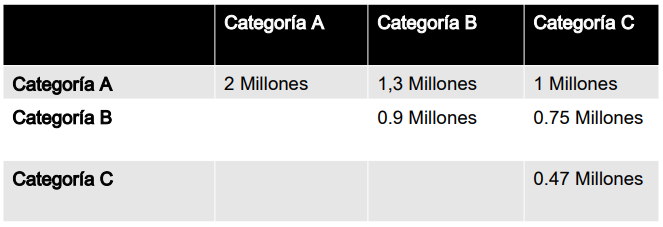


• Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

• Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

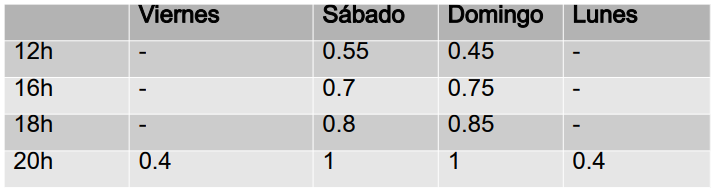


Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la siguiente tabla dependiendo del número de coincidencias:


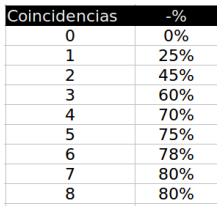

(*) La respuesta es obligatoria





                                        

In [1]:
import pandas as pd

def combinar_equipos(lista_1, lista_2, audiciencia_grupos):
  combinacion = list()
  for i in lista_1:
    for j in lista_2:
      combinacion.append([i,j,audiciencia_grupos[i[0]+j[0]]])

  return combinacion

def get_partidos(asc = True):
  grupo_a = ["A1", "A2", "A3"]
  grupo_b = ["B{}".format(i) for i in range(1, 12)]
  grupo_c = ["C{}".format(i) for i in range(1, 7)]
  audiencia_grupo = {
      'AA':2,
      'AB':1.3,
      'AC':1,
      'BB':0.9,
      'BC':0.75,
      'CC':0.47
  }

  combinacion_1 = combinar_equipos(grupo_a, grupo_b, audiencia_grupo)
  combinacion_2 = combinar_equipos(grupo_a, grupo_c, audiencia_grupo)
  combinacion_3 = combinar_equipos(grupo_b, grupo_c, audiencia_grupo)
  combinacion_4 = combinar_equipos(grupo_a, grupo_a, audiencia_grupo)
  combinacion_5 = combinar_equipos(grupo_b, grupo_b, audiencia_grupo)
  combinacion_6 = combinar_equipos(grupo_c, grupo_c, audiencia_grupo)

  combinacion_equipos = combinacion_1 + combinacion_2 + combinacion_3 + combinacion_4 + combinacion_5 + combinacion_6

  equipo_1 = list()
  equipo_2 = list()
  comb_audiencia = list()
  estado_partido = list()

  for comb in combinacion_equipos:
    equipo_1.append(comb[0])
    equipo_2.append(comb[1])
    comb_audiencia.append(comb[2])
    estado_partido.append(1)

  df_partidos = pd.DataFrame(data={'equipo1':equipo_1, 'equipo2':equipo_2, 'audiencia':comb_audiencia, 'estado':estado_partido})

  return df_partidos[~(df_partidos['equipo1'] == df_partidos['equipo2'])].sort_values('audiencia', ascending=asc)

def get_horarios(asc=True):
  horarios = [['Vi20h', 0.4],['Sa12h', 0.55],['Sa16h', 0.7],['Sa18h', 0.8],['Sa20h', 1],['Do12h', 0.45],['Do16h', 0.75],['Do18h', 0.85],['Do20h', 1],['Lu20h', 0.4]]
  l_horarios = list()
  l_coeficiente = list()
  l_estado_horario = list()
  l_cantidad_partidos = list()
  l_audiencia_total = list()

  for i in horarios:
    l_horarios.append(i[0])
    l_coeficiente.append(i[1])
    l_estado_horario.append('disponible')
    l_cantidad_partidos.append(0)
    l_audiencia_total.append(0)

  df_horarios = pd.DataFrame(data={
      'horario':l_horarios, 
      'coeficiente':l_coeficiente, 
      'estado':l_estado_horario, 
      'nro_partidos':l_cantidad_partidos,
      'audiencia_total': l_audiencia_total})

  return df_horarios.sort_values('coeficiente', ascending=asc)

def get_factor_repetidos():

  factor_repetidos_cantidad = [1,2,3,4,5,6,7,8,9]
  factor_repetidos_valor = [1,0.75,0.55,0.4,0.3,0.25,0.22,0.2,0.2]

  df_factor_repetidos = pd.DataFrame(data={'ctd_partidos':factor_repetidos_cantidad, 'factor':factor_repetidos_valor})
  
  return df_factor_repetidos

def get_partido_mayor_audiencia(df):
  partido = None
  df_partido = df[df['estado']==1].sort_values('audiencia', ascending=False)
  
  if not df_partido.empty:
    partido = df_partido.iloc[0].copy()
    df.loc[(df['equipo1']==partido.equipo1) & (df['equipo2']==partido.equipo2), 'estado'] = 0

  return partido

def crear_programacion():
  return pd.DataFrame(data={
        'equipo1':list(),
        'equipo2':list(),
        'audiencia':list(),
        'horario':list(),
        'coeficiente':list(),
        'nro_partidos_horario':list(),
        'factor':list(),
        'audiencia_total':list()})
  
def add_programacion(partido, horario, df_programacion):

  if partido is not None:
    df_programacion.loc[len(df_programacion)] = {
          'equipo1':partido.equipo1,
          'equipo2':partido.equipo2,
          'audiencia':partido.audiencia,
          'horario':horario.horario,
          'coeficiente':horario.coeficiente}

def delete_partido_programacion(partido, df_programacion):
  if partido is not None:
    where =  df_programacion[(df_programacion['equipo1']==partido.equipo1) & (df_programacion['equipo2']==partido.equipo2)]
    df_programacion.drop(where.index, inplace=True)

def calcular_audiencia_total(df_programacion, df_factor):

  total = 0

  df_group_horario = df_programacion.groupby('horario', as_index=False).agg(ctd_repetidos=('horario','count'))
  for horario in df_group_horario.itertuples():
    factor = df_factor[df_factor['ctd_partidos']==horario.ctd_repetidos]['factor'].iloc[0]
    df_partidos_horario = df_programacion[df_programacion['horario']==horario.horario]
    
    for partido in df_partidos_horario.itertuples():
      audiencia_partido = factor*partido.audiencia*partido.coeficiente
      total += audiencia_partido
      df_programacion.loc[(df_programacion['equipo1']==partido.equipo1) & (df_programacion['equipo2']==partido.equipo2), 'nro_partidos_horario'] = horario.ctd_repetidos
      df_programacion.loc[(df_programacion['equipo1']==partido.equipo1) & (df_programacion['equipo2']==partido.equipo2), 'factor'] = factor
      df_programacion.loc[(df_programacion['equipo1']==partido.equipo1) & (df_programacion['equipo2']==partido.equipo2), 'audiencia_total'] = audiencia_partido

  return total

def organizar_partidos(df_partidos, df_horarios, df_factor_repetidos):
  df_programacion = crear_programacion()

  is_maxima_audiencia = False
  audiencia_total = 0

  while is_maxima_audiencia == False:
    for horario in df_horarios.itertuples():
      partido = get_partido_mayor_audiencia(df_partidos)
      
      add_programacion(partido, horario, df_programacion)
      audiencia = calcular_audiencia_total(df_programacion, df_factor_repetidos)

      if audiencia > audiencia_total:
        audiencia_total = audiencia
      else:
        is_maxima_audiencia = True
        delete_partido_programacion(partido, df_programacion)
        audiencia_total = calcular_audiencia_total(df_programacion, df_factor_repetidos)
        break
      
  return df_programacion, audiencia_total

In [2]:
df_partidos = get_partidos(asc=False)
df_horarios = get_horarios(asc=False)
df_factor_repetidos = get_factor_repetidos()

programacion_partidos, audiencia_total = organizar_partidos(df_partidos, df_horarios, df_factor_repetidos)

Total de audiencia en la programación de partidos:

In [11]:
print(audiencia_total)

16.764000000000003


Audiencia por cada partido:

In [12]:
display(programacion_partidos)

,equipo1,equipo2,audiencia,horario,coeficiente,nro_partidos_horario,factor,audiencia_total
0,A3,A2,2.0,Sa20h,1.00,3.0,0.55,1.10000
1,A3,A1,2.0,Do20h,1.00,3.0,0.55,1.10000
2,A2,A3,2.0,Do18h,0.85,3.0,0.55,0.93500
3,A2,A1,2.0,Sa18h,0.80,3.0,0.55,0.88000
4,A1,A3,2.0,Do16h,0.75,3.0,0.55,0.82500
5,A1,A2,2.0,Sa16h,0.70,3.0,0.55,0.77000
6,A1,B1,1.3,Sa12h,0.55,3.0,0.55,0.39325
7,A3,B7,1.3,Do12h,0.45,3.0,0.55,0.32175
8,A3,B2,1.3,Vi20h,0.40,3.0,0.55,0.28600
9,A3,B3,1.3,Lu20h,0.40,3.0,0.55,0.28600


(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

Para el problema elejido se han utilizado 4 estructuras de datos, para los partidos, los horarios, los factores por cantidad de partidos en el mismo horario y para los resultados que es la programa de partidos finales.

- Estructura de datos para los partidos: Almacena todos los posibles partidos entre los equipos A, B y C. Esta estructura ayuda a tener los partidos que tienen mayor audiencia.
```
  <partidos>:
    <equipo1>: Nombre del equipo que pertenece al grupo A,B o C
    <equipo2>: Nombre del equipo que pertenece al grupo A,B o C
    <audiencia>: Audiencia que genera el enfrentamiento de ambos equipos en millones
    <estado>: Indica si el partido ya se asignó a un horario.
```
- Estructura de datos para los horarios: Almacena todos los horarios disponibles  el coeficiente de audiencia en ese horario. Inicialmente se definió  una estructura como la que se va a mostrar, pero finalmente solo se utilizaron los dos primeros campos.
```
  <horarios>:
    <horario>: Nombre del horario, iniciales del dia y la hora(en 24h).
    <coeficiente>: Coeficiente de audiencia en ese horario.
    <estado>: Indica si el horario está disponible
    <nro_partidos>: Cantidad de partidos en un horario.
    <audiencia_total>: Audiencia total en un horario en Millones.
```
- Estructura de datos para factor de cantidad de partidos: Almacena el factor que se debe aplicar por cada número de partidos que se juegan en un mismo horario.
```
  <factor_repetidos>:
    <ctd_partidos>: Números de partidos que se juega en un mismo horario.
    <factor>: Factor que se aplica por numeros de partidos jugados en un mismo horario
```
- Estructura para 



In [6]:
df_factor_repetidos

,ctd_partidos,factor
0,1,1.00
1,2,0.75
2,3,0.55
3,4,0.40
4,5,0.30
5,6,0.25
6,7,0.22
7,8,0.20
8,9,0.20


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

(*)Calcula la complejidad del algoritmo 

Respuesta

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta